# 1 Business Understanding

## 1.0 Overview
With the rapid expansion of internet streaming platforms, users are overwhelmed by the sheer volume of available movies. Providing personalized recommendations is critical for increasing user engagement, satisfaction, and retention. The MovieLens (ml-latest-small) dataset, rom [MovieLens](http://movielens.org) (a movie recommendation service),  includes user-generated 5-star ratings and free-text tags that can be used to create a powerful recommendation engine.


## 1.1 Problem Statement
With thousands of movies accessible on streaming platforms, customers struggle to discover ones they'll like. This choice overload frequently results in dissatisfaction, decision fatigue, and low user engagement.
Many systems rely on generic rankings or trending lists that do not consider individual preferences. This leads to irrelevant movie suggestions that do not match user preferences, longer search times lower user happiness, or low retention rates due to users potentially switching to competitors with better recommendations.

The goal is to create a movie recommendation system that can predict user preferences based on previous interactions. Specifically, we want to:

## 1.2 Objectives
&#x2611; Analyze user ratings and tags to find patterns and trends.

&#x2611; Create a recommendation model that incorporates collaborative filtering, content-based filtering, or hybrid approaches.

&#x2611; Address critical issues such as data scarcity, cold start issues, and bias in user ratings.

&#x2611; Assess model performance using relevant measures such as RMSE or MAE.



## 1.3 Proposed solution
The objective is to examine and use the dataset to boost user engagement by developing a movie recommendation engine. Potential applications include:

&#x1f8ae; Personalized **Movie Recommendations** - Predict user preferences based on previous ratings.

&#x1f8ae; Customize content by **segmenting and clustering users** based on similar preferences.

&#x1f8ae; **Trend Analysis and Insights**: Discover popular genres, top-rated movies, and viewing behaviors.

&#x1f8ae; Tag-based **sentiment analysis** provides insights into user perception of movies.


&#x2713; **Next Steps**

&#x2A39; Exploratory Data Analysis (EDA) – Understand rating distributions, popular tags, and trends.

&#x2A3B; Feature Engineering – Transform text tags into meaningful numerical features.

&#x2A39; Model Selection – Choose between collaborative filtering or content-based filtering.

&#x2A3B; Evaluation Metrics – Use RMSE or MAE to assess recommendation performance.



### Challenges & Considerations
* Data Sparsity: Not all users have rated all movies, leading to gaps in the dataset.
* Cold Start Problem: New users/movies lack enough data for accurate recommendations.
* Bias in Ratings: Some users may consistently rate higher or lower than others.
* Scalability: The model should be efficient enough to handle large datasets in real-world applications.

# 2 Data Understanding

The MovieLens dataset (ml-latest-small) comprises user-generated movie ratings as well as free-text tags. This dataset is commonly used in recommendation systems, where businesses try to improve the customer experience by proposing movies based on user interests.Companies like Netflix, Hulu, and Amazon Prime Video use similar databases to boost user engagement, retention, and satisfaction through personalized suggestions.

The dataset consists of 5-star ratings and free-text tags from MovieLens, an online movie recommendation service.

Users rate movies on a 1-5 star scale (higher ratings indicate better user satisfaction).
Tags are free-text descriptions provided by users to describe movies (e.g., "thriller," "comedy," "Oscar-winning").
The dataset is anonymized (users are represented by IDs).

|File Name | Description|
|----------|------------|
|ratings.csv |	Contains user ratings for movies (1-5 scale).|
|movies.csv |	Metadata including movie titles and genres.|
|tags.csv |	Free-text tags assigned by users to movies.|
|links.csv |	Provides mappings to external movie databases (IMDB, TMDb).|


**Identifiers**
- *userId*: random and anonymous IDs given to identify users. MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files)

- *movieId*: IDs given to identify movies. Since only those movies which have 1 or more rating or tag are selected, it is not a complete sequence. Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files)

**Movies Data columns:**
- *movieId*:Unique movie identifier.
- *title:* Movie title, and include the year of release in parentheses.
- *genre:* a pipe-separated list, and are selected from the following: Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, 
Sci-Fi, Thriller, War, Western and "no genres listed"

**Ratings Data columns:**
- *userId* – Unique identifier for each user.
- *movieId* – Unique identifier for each movie.
- *rating:* User rating (1-5 stars), with half-star increments (0.5 stars - 5.0 stars).
- *timestamp:* Time when the rating was given.

**Links data features:**
- *movieId:* Unique identifier for each movie.
- *imdbId:* an identifier for movies used by <http://www.imdb.com>
- *tmdbId:* an identifier for movies used by <https://www.themoviedb.org>

**Tags data features:**
- *userId* – Unique user identifier.
- *movieId* – Movie being tagged.
- *tag:* Free-text tag (e.g., "thrilling," "mind-blowing," "classic").
- *timestamp:* Time when the tag was added


In [362]:
# Data understanding

# import the relevant libraries

# import data manipulation libraries
import pandas as pd
import numpy as np
import scipy.sparse as sp

# import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import modeling libraries
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV#, cross_validate

# Processing 
from surprise.prediction_algorithms import KNNBasic
from surprise import accuracy

# import Preprocessing and Metric Evaluation libraries
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error#, root_mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

import warnings; warnings.simplefilter('ignore')

In [363]:
# Load the datasets
movies_data = pd.read_csv("Data/movies.csv")

ratings_data = pd.read_csv("Data/ratings.csv")

links_data = pd.read_csv("Data/links.csv")

tags_data = pd.read_csv("Data/tags.csv")

In [364]:
# Explore movies data

# view top 5 rows
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


*Observation*:

- The title has the 'year' included at the end, it may require to be separated.

- There are movies with more than 1 genre classification on the genres features. 

In [365]:
# Get Summary info of the movies dataframe
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


*Observation*: All features have the right data type and it has no null values

In [366]:
# Check Shape
movies_data.shape

(9742, 3)

In [367]:
# Get summary statistics of movies data
movies_data.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Understand ratings data

In [368]:
# view top 5 rows
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


*Comment*:

The timestamp features may be converted to datetime where need be such as helping to observe trends

In [369]:
# Get Summary info of the ratings dataframe
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


*Observation*: All features have the right data type and it has no null values

In [370]:
# Get summary statistics of ratings data
ratings_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


understand links data:

In [371]:
# view top 5 rows
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [372]:
# Get Summary info of the links dataframe
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


*Observation*: All features have the right data type and it has $8$ null values

In [373]:
# Get summary statistics of links data
links_data.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


Understand tags data:

In [374]:
# view top 5 rows
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


*Comment*:
The timestamp features may be converted to datetime where need be such as helping to observe trends

In [375]:
# Get Summary info of the tags dataframe
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


*Observation*: All features have the right data type and it has no null values

In [376]:
# Get summary statistics of tags data
tags_data.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


# 3 Data Preparation
This involves activities such us handling missing values, checking for duplicates, dropping unnecessary columns, etc.

## 3.1 Data Cleaning


### 3.1.1 Handling Missing Values

In [377]:
# Check movies data for null values
movies_data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [378]:
# Check ratings data for null values
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [379]:
# Check tags data for null values
tags_data.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [380]:
# Check links data for null values
links_data.isna().sum()


movieId    0
imdbId     0
tmdbId     8
dtype: int64

Links data has missing values. Let us see the rows with the missing values since they are few.

In [381]:
# List the rows with nulls
links_data[links_data['tmdbId'].isnull()]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


The links data had $8$ missing values. Let's check

Since we dont have the exact tmdbId of the movies with null values, we can then replace the nulls with a '0'.

In [382]:
# Replace nulls with a '0'
links_data.fillna(0, inplace=True)

In [383]:
# Check nulls
links_data.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64


### 3.1.2 Duplicate Values


Let us che the datasets for duplicate values.

In [384]:
# Check duplicates
movies_data.duplicated().sum()

0

In [385]:
# Check duplicates
ratings_data.duplicated().sum()

0

In [386]:
# Check duplicates
tags_data.duplicated().sum()

0

In [387]:
# Check duplicates
links_data.duplicated().sum()

0

*Comment*:

No duplicates in all the datasets

### 3.1.3 Column Editing
We can drop columns that will not be of use as of now. This will include the timestamp, imdbId & tmdbId columns


We can now merge the data to have one dataset to explore.

### 3.1.4 Merging the datasets and handling missing values & duplicates

In [388]:
# Merge ratings with movie titles
merged_df = ratings_data.merge(movies_data, on="movieId", how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [389]:
# Merge with the tags data
merged_df = merged_df.merge(tags_data[['userId', 'movieId', 'tag']], on=["userId", "movieId"], how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     102677 non-null  int64  
 1   movieId    102677 non-null  int64  
 2   rating     102677 non-null  float64
 3   timestamp  102677 non-null  int64  
 4   title      102677 non-null  object 
 5   genres     102677 non-null  object 
 6   tag        3476 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.3+ MB


*Observation:*
The tag column has null values

In [390]:
# Check null values
merged_df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          99201
dtype: int64

The merged data has 99,201 values missing on the tags column. The dtype is object (string).

We can then handle the null values by replacing 'null' by 'Unknown'

In [391]:
# Replace nulls
merged_df.fillna("Unknown", inplace=True)

In [392]:
# Recheck nulls
merged_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

In [393]:
# Check for duplicates
merged_df.duplicated().sum()

0

We are good to go!

In [394]:
# Check the last 5 rows
merged_df.tail()

,userId,movieId,rating,timestamp,title,genres,tag
102672,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,Unknown
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed
102674,610,168250,5.0,1494273047,Get Out (2017),Horror,Unknown
102675,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,Unknown
102676,610,170875,3.0,1493846415,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,Unknown


# 4. Exploring the Dataset

In [395]:
# Summary of numerical columns
print(merged_df.describe())

# Count unique users & movies
print(f"Unique users: {merged_df['userId'].nunique()}")
print(f"Unique movies: {merged_df['movieId'].nunique()}")

              userId        movieId         rating     timestamp
count  102677.000000  102677.000000  102677.000000  1.026770e+05
mean      327.761933   19742.712623       3.514813  1.209495e+09
std       183.211289   35884.400990       1.043133  2.170117e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019138e+09
50%       328.000000    3005.000000       3.500000  1.186590e+09
75%       477.000000    8366.000000       4.000000  1.439916e+09
max       610.000000  193609.000000       5.000000  1.537799e+09
Unique users: 610
Unique movies: 9724


**Observation**
- From the statistics above, we can see the min ratings at 0.5 and the maximun rating given is 5.
- Averagely, movies are rated at 3.5

## 4.1 Univariate

In [396]:
# Split the Categorical columns from the Numerical Columns
num_cols = merged_df.select_dtypes(include=['number', 'float', 'int']).columns
# cat_cols = df.select_dtypes(exclude=['number', 'float', 'int']).columns

What is the distribution of movie ratings?

### 4.1.1 Movie Ratings distribution

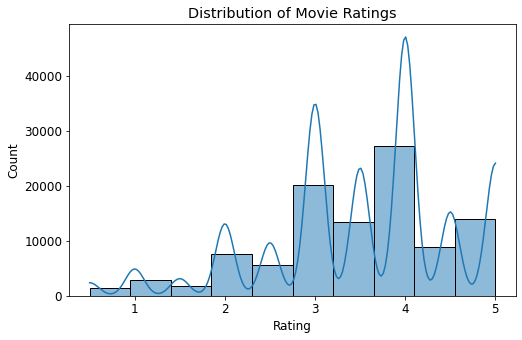

In [397]:
# Let us use a histplot to see distribitons of the ratings

# Plot
plt.figure(figsize=(8,5))
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

*Comment*:

Most movies are rated between 3 and 4 with 0.5 being the least.

In [398]:
# def graph_plot(col):
#     # Style
# #     plt.style.use('_mpl-gallery')
#     if col in num_cols:

#         # plot:
#         fig, ax = plt.subplots(figsize=(8, 6))

#         ax.hist(merged_df[col], bins=20, linewidth=0.5, edgecolor="white")

#         plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
#         ax.set_xlabel(f'{col.capitalize()}')
        
#         ax.set_ylabel('Distribution')
        
#         plt.show()
        
#     else:

#         # plot:
#         fig, ax = plt.subplots(figsize=(8, 6))
        
#         data = merged_df[col].value_counts(sort=True)
        
#         ax.bar(data.index[:10] if len(data) > 10 else data.index, 
#                data.values[:10] if len(data) > 10 else data.values, 
#                linewidth=0.5, edgecolor="white")

#         plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
#         ax.set_ylabel('Distribution')
        
#         plt.show()

### 4.1.2 Top 10 most rated

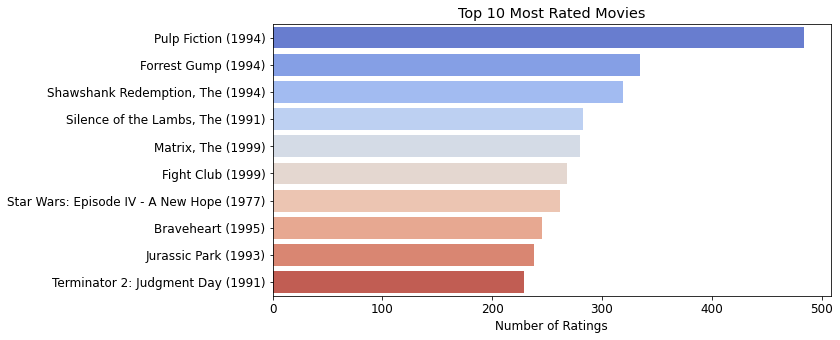

In [399]:
# Count how many times each movie was rated
popular_movies = merged_df['title'].value_counts().head(10)

# Plot top 10 most rated movies
plt.figure(figsize=(10,5))
sns.barplot(x=popular_movies.values, y=popular_movies.index, palette="coolwarm")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.show()

*Observation*

* The pulp fiction has the highest number of ratings
* Majority of the top 10 movies are rated between 200-300 times

### 4.1.3 Most common genres
Lets us find the most common genres. We will have to split the genre column into specific genres as some movie are multi-classified

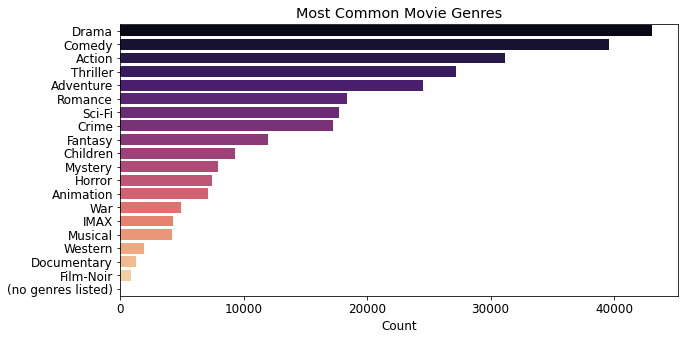

In [400]:
# Split genres into a list
all_genres = merged_df['genres'].str.split('|').explode()

# Count genre occurrences
genre_counts = all_genres.value_counts()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Most Common Movie Genres")
plt.xlabel("Count")
plt.show()

*Observation*
* The most common genres is Drama and Comedy
* Film-Noir is the least common genre

### 4.1.4 User activity

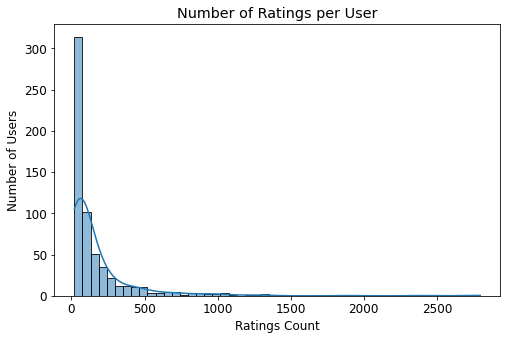

In [401]:
# Count ratings per user
user_ratings = merged_df.groupby("userId")["rating"].count()

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(user_ratings, bins=50, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Users")
plt.show()

*Observation:*

Most users rated movies 50 times (over 300 users)

## 4.2 Bivariate

### 4.2.1 Average Rating per Movie

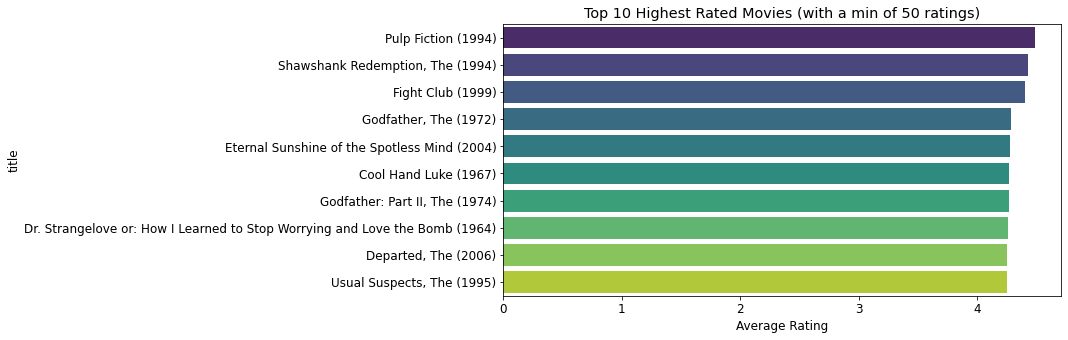

In [402]:
# Get movies with highest average rating (with at least 50 ratings)
movie_ratings = merged_df.groupby("title")["rating"].agg(["mean", "count"])
top_movies = movie_ratings[movie_ratings["count"] >= 50].sort_values("mean", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_movies["mean"], y=top_movies.index, palette="viridis")
plt.title("Top 10 Highest Rated Movies (with a min of 50 ratings)")
plt.xlabel("Average Rating")
plt.show()

*Comment*

As from before, Pulp fiction is the highest rating, but also averagely.

### 4.2.2 Rating vs. Number of Ratings (Popularity Bias)

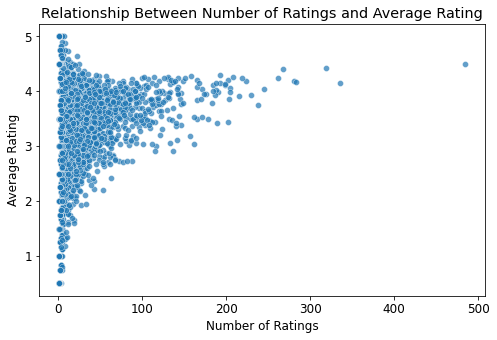

In [403]:
# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=movie_ratings["count"], y=movie_ratings["mean"], alpha=0.7)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Relationship Between Number of Ratings and Average Rating")
plt.show()

*Comment*: Most ratings seem to be between 2.5 and 4 average rating

### 4.2.3 Relationship Between Movie Ratings & Number of Ratings

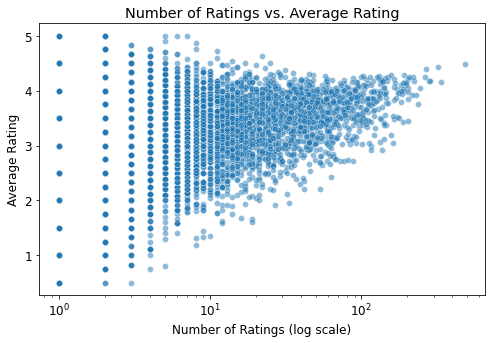

In [404]:
# Calculate mean rating & count per movie
movie_stats = merged_df.groupby("title")["rating"].agg(["mean", "count"])

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=movie_stats["count"], y=movie_stats["mean"], alpha=0.5)
plt.xscale("log")
plt.title("Number of Ratings vs. Average Rating")
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.show()

*Comment*: Movies with more ratings tend to have higher ratings.

### 4.2.4 Genre vs. Average Rating

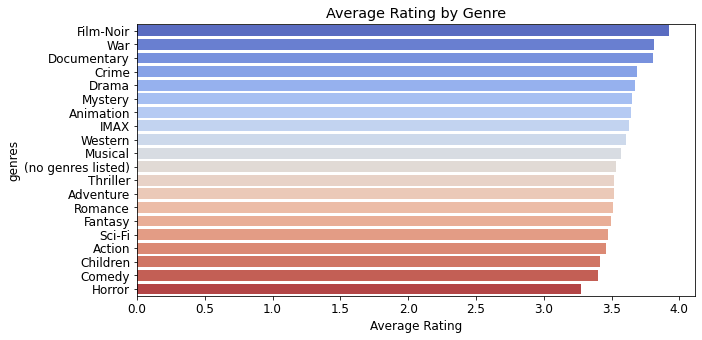

In [405]:
# Explode genres into individual rows
genre_ratings = merged_df.assign(genres=merged_df['genres'].str.split('|')).explode('genres')

# Compute average rating per genre
genre_avg_rating = genre_ratings.groupby("genres")["rating"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.title("Average Rating by Genre")
plt.show()

*Comment:* 
1. The Horror genre consistently receives lower ratings than others.
2. The Film-Noir, war and Documentary genres receive higher ratings than others
3. Most ratings are between 3.5 and 4.0 

### 4.2.5 Relationship Between User Activity & Average Rating Given


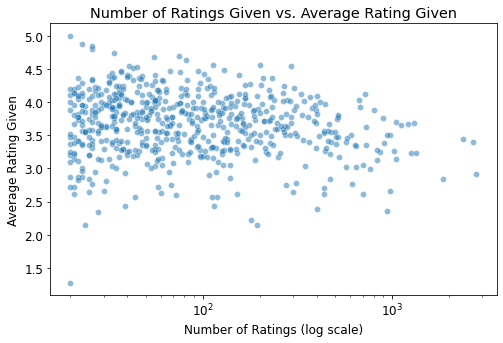

In [406]:
# Calculate user rating count & mean rating
user_stats = merged_df.groupby("userId")["rating"].agg(["mean", "count"])

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=user_stats["count"], y=user_stats["mean"], alpha=0.5)
plt.xscale("log")
plt.title("Number of Ratings Given vs. Average Rating Given")
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating Given")
plt.show()

*Comment:*

Most users give a rating between 3.0 and 4.5, with very few giving the extremes.

### 4.2.6 User Activity vs. Average Rating

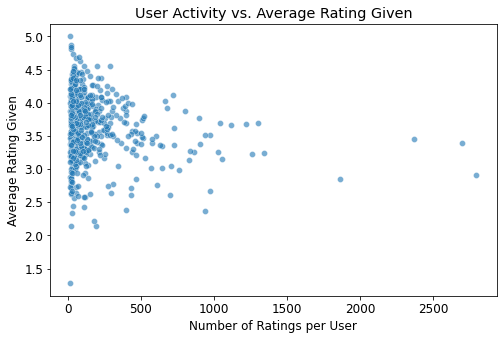

In [407]:
# Compute ratings per user and their average rating
user_activity = merged_df.groupby("userId")["rating"].agg(["count", "mean"])

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=user_activity["count"], y=user_activity["mean"], alpha=0.6)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Average Rating Given")
plt.title("User Activity vs. Average Rating Given")
plt.show()

*Observation:* Users have given less 500 ratings with majority ratings between 3-4


## 4.3 Multivariate

### 4.3.1 Feature Correlations Heatmap
Let us have a heatmap to check if features like timestamps, user behavior, and ratings are correlated.

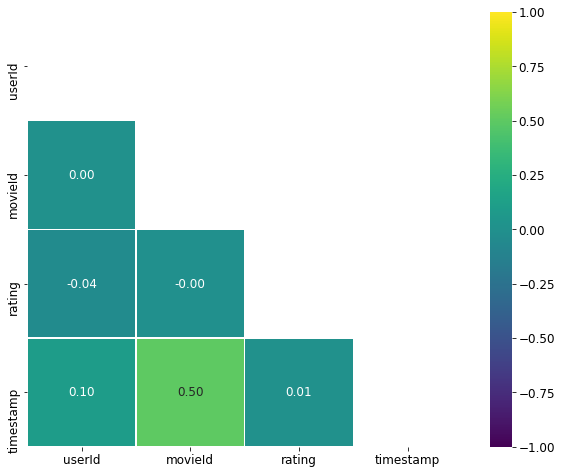

In [408]:
# Get the corr values
corr_matrix = merged_df.corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

*Observation:*

There is no meaningful correlations between the data features.

### 4.3.2 Rating Trends Over Time


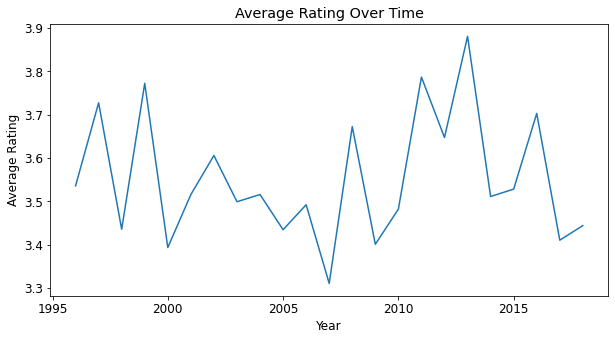

In [409]:
# Convert timestamp to datetime
merged_df['date'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Extract year
merged_df['year'] = merged_df['date'].dt.year

# Compute average rating per year
rating_trend = merged_df.groupby("year")["rating"].mean()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=rating_trend.index, y=rating_trend.values)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Time")
plt.show()

*Comment:*

1. The ratings were higher during the year of 2010 to 2015 
2. Between 2000 and  2007, was the lowest rating period.
This may indicate user preference shifts or something caused low ratings during that time

### 4.3.3 Genre Distribution Across Different Rating Levels

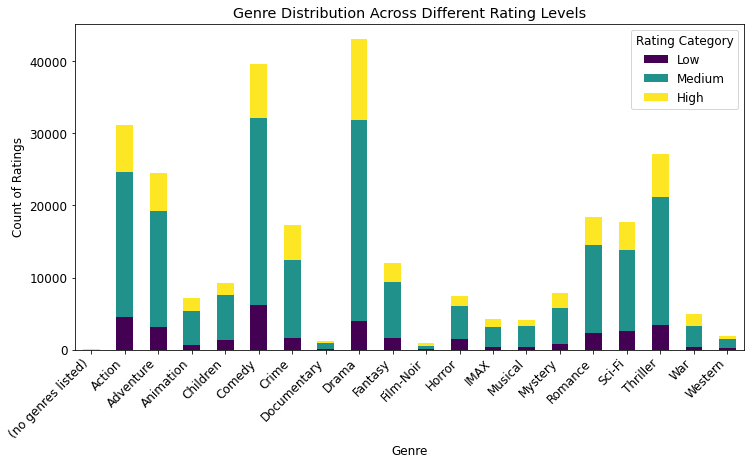

In [410]:
# Categorize ratings into bins
merged_df["rating_category"] = pd.cut(
    merged_df["rating"], bins=[0, 2, 4, 5], labels=["Low", "Medium", "High"]
)

# Explode genres (assuming genres are separated by '|')
genre_ratings = merged_df.copy()
genre_ratings["genres"] = genre_ratings["genres"].str.split("|")
genre_ratings = genre_ratings.explode("genres")

# Count of genres per rating category
genre_rating_dist = genre_ratings.groupby(["genres", "rating_category"]).size().unstack().fillna(0)

# Plot stacked bar chart
genre_rating_dist.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")

plt.title("Genre Distribution Across Different Rating Levels")
plt.xlabel("Genre")
plt.ylabel("Count of Ratings")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Rating Category")
plt.show()

*Comment* 

1. Most of the genres are medium rated,followed by the high rating. 
Minimim ratings are quite low in numbers
2. Drama is the highest rated genre.
3. Documentary, Film-Noir and Western are low in number as seen before

### 4.3.4 Top 10 most correlated movies
Let's see the most corelated movies

In [411]:
# Create a pivot table of users and movie ratings
movie_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating')

# Compute correlation for two popular movies
corr_matrix = movie_matrix.corr(method='pearson', min_periods=50)
corr_movie = corr_matrix["Forrest Gump (1994)"].dropna().sort_values(ascending=False)

# Show most correlated movies
print(corr_movie.head(10))



title
Forrest Gump (1994)                                                          1.000000
Mr. Holland's Opus (1995)                                                    0.652144
Pocahontas (1995)                                                            0.550118
Big (1988)                                                                   0.492351
Good Will Hunting (1997)                                                     0.484042
Aladdin (1992)                                                               0.464268
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.461204
American History X (1998)                                                    0.457287
Legends of the Fall (1994)                                                   0.439889
Contact (1997)                                                               0.438597
Name: Forrest Gump (1994), dtype: float64


In [412]:
# Confirm null values
merged_df.isna().sum()

userId             0
movieId            0
rating             0
timestamp          0
title              0
genres             0
tag                0
date               0
year               0
rating_category    0
dtype: int64

# 5. Feature Transformation

## 5.1 Encoding Categorical Features
Since we have handled missing values, we can go straight to feature engineering.

First we will use ***MultiLabelBinarizer*** to encode the genres column to convert genres into binary features. This because a row can have more than 2 types of genre.


In [413]:
# Convert genre string to list
merged_df["genres"] = merged_df["genres"].str.split('|')

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(merged_df["genres"]), columns=mlb.classes_)

# Concatenate with the main dataset
merged_df = pd.concat([merged_df, genre_encoded], axis=1).drop(columns=["genres"])

## 5.2 Creating Temporal Features
Extract Year from Timestamp. This will give the year the rating was done.

In [414]:
merged_df["rating_year"] = pd.to_datetime(merged_df["timestamp"], unit="s").dt.year

## 5.3 Aggregated Movie & User Statistics
Movie Popularity & Average Rating

In [415]:
# Calculate average rating & count per movie
movie_features = merged_df.groupby("movieId").agg(
    avg_movie_rating=("rating", "mean"),
    total_movie_ratings=("rating", "count")
).reset_index()

# Merge back into dataset
merged_df = merged_df.merge(movie_features, on="movieId", how="left")



In [416]:
# Check top 5 rows
merged_df.head(2)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   userId               102677 non-null  int64         
 1   movieId              102677 non-null  int64         
 2   rating               102677 non-null  float64       
 3   timestamp            102677 non-null  int64         
 4   title                102677 non-null  object        
 5   tag                  102677 non-null  object        
 6   date                 102677 non-null  datetime64[ns]
 7   year                 102677 non-null  int64         
 8   rating_category      102677 non-null  category      
 9   (no genres listed)   102677 non-null  int32         
 10  Action               102677 non-null  int32         
 11  Adventure            102677 non-null  int32         
 12  Animation            102677 non-null  int32         
 13  Children      

User Rating Behaviour

In [417]:
# Calculate average rating & count per user
user_features = merged_df.groupby("userId").agg(
    avg_user_rating=("rating", "mean"),
    total_user_ratings=("rating", "count")
).reset_index()

# Merge back into dataset
merged_df = merged_df.merge(user_features, on="userId", how="left")

In [418]:
# Check summary info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   userId               102677 non-null  int64         
 1   movieId              102677 non-null  int64         
 2   rating               102677 non-null  float64       
 3   timestamp            102677 non-null  int64         
 4   title                102677 non-null  object        
 5   tag                  102677 non-null  object        
 6   date                 102677 non-null  datetime64[ns]
 7   year                 102677 non-null  int64         
 8   rating_category      102677 non-null  category      
 9   (no genres listed)   102677 non-null  int32         
 10  Action               102677 non-null  int32         
 11  Adventure            102677 non-null  int32         
 12  Animation            102677 non-null  int32         
 13  Children      

## 6. Feature Selection

We have added new features and the columns are now 34. We cannot use all the features, so we can pick the relevant ones

In [419]:
# Create a list
features = [
    "avg_movie_rating", "total_movie_ratings",
    "avg_user_rating", "total_user_ratings",
    "rating_year"
] + list(mlb.classes_)  # Include genre features
X = merged_df[features]
y = merged_df["rating"]

# 5. Modeling
Since we are doing a recommendation system we are using the Surprise library, we can use the SVD model and KNN model

In [420]:
class SurprisePipeline:
    # Initializes the pipeline
    def __init__(self, model_type="KNN", rating_scale=(0.5, 5.0), sim_metric="cosine", user_based=False):
        self.reader = Reader(rating_scale=rating_scale)
        self.trainset = None
        self.predictions = None
        
        # Select model
        if model_type == "KNN":
            self.sim_options = {"name": sim_metric, "user_based": user_based}
            self.model = KNNBasic(sim_options=self.sim_options)
        elif model_type == "SVD":
            self.model = SVD()
        else:
            raise ValueError("Invalid model_type. Choose 'KNN' or 'SVD'.")
    
    # Load data
    def load_data(self, dataframe):
        # Load the dataset from a Pandas DataFrame
        data = Dataset.load_from_df(dataframe[['userId', 'movieId', 'rating']], self.reader)
        
        # build the trainset data
        self.trainset = data.build_full_trainset()
    
    # Train the model  
    def train(self):
        """Trains the model on the full trainset."""
        # Return an error if trainset is empty otherwise fit the model
        if self.trainset is None:
            raise ValueError("Data must be loaded before training.")
        self.model.fit(self.trainset)
    
    # Evaluate the model using RMSE
    def evaluate(self):
        """Evaluates the model using RMSE on the training data."""
        
        # Return an error if trainset is empty
        if self.trainset is None:
            raise ValueError("Model must be trained before evaluation.")
        
        # Build the testset
        testset = self.trainset.build_testset()
        
        # Predict
        self.predictions = self.model.test(testset)
        
        # Get RMSE Value
        rmse_value = accuracy.rmse(self.predictions)
        
        # Return RMSE
        return rmse_value
    

## 5.1 Matrix Factorization (SVD)
Singular Value Decomposition (SVD) decomposes the user-item matrix into latent factors.

In [421]:
# Implement SVD model:
svd_pipeline = SurprisePipeline(model_type="SVD")
svd_pipeline.load_data(merged_df)
svd_pipeline.train()
svd_rmse = svd_pipeline.evaluate()

RMSE: 0.6292


## 5.2 K-Nearest Neighbors (KNN-Based)

In [422]:
# Run the KNN Pipeline
knn_pipeline = SurprisePipeline(model_type="KNN")
knn_pipeline.load_data(merged_df)
knn_pipeline.train()
knn_rmse = knn_pipeline.evaluate()


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9070


**Comment**

The SVD Model has an RMSE of 0.63

The KNN model has a better score with an RMSE score of 0.91 (91%)

# 6. Model Tuning

The best model between the two for this recommendation system is the KNN model.

But due to memory usage challenges, we will fine tune the SVD model to see how the performance changes

## 6.1 The SVD Model Fine-tuning
Let us fine-tune the SVD model and see if the performance will improve.

In [423]:
# Define parameter grid for SVD
param_grid_svd = {
    'n_factors': [10, 20, 50],  # Number of latent factors
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.1, 0.4]  # Regularization
}

# Define Reader
reader = Reader(rating_scale=(0.5, 5.0))

# Load Data (Ensure merged_df contains 'userId', 'movieId', 'rating')
data_to_tune = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Run GridSearchCV
grid_svd = GridSearchCV(KNNBasic, param_grid_svd, measures=['rmse'], cv=5, n_jobs=-1)

# Fit the grid search to the dataset
grid_svd.fit(data_to_tune) 

# Best parameters & model
print("Best SVD params:", grid_svd.best_params['rmse'])
best_svd = grid_svd.best_estimator['rmse']


Best SVD params: {'n_factors': 10, 'lr_all': 0.002, 'reg_all': 0.02}


Now let us fit the best parameters for optimization

In [424]:
# Get best params for RMSE
best_params_svd = grid_svd.best_params['rmse']  

# Initialize the model with best parameters
best_svd = SVD(n_factors=best_params_svd['n_factors'], 
               reg_all=best_params_svd['reg_all'], 
               lr_all=best_params_svd['lr_all'])

# Recreate the trainset
trainset = data_to_tune.build_full_trainset()

# Fit/Train the model on the full training set
best_svd.fit(trainset)

# Test the model on the test set
testset = trainset.build_testset()  # Generate testset
predictions_svd = best_svd.test(testset)  # Get predictions

# Evaluate RMSE on test predictions
svd_best_rmse = accuracy.rmse(predictions_svd)

# Print results
print(f"Best SVD Model Test RMSE: {svd_best_rmse}")


RMSE: 0.8430
Best SVD Model Test RMSE: 0.8429969911700007


## 6.2 Fine-tuning the KNN model
Let us also fine-tune the KNN model

In [425]:
# # Define hyperparameters for KNN
# param_grid_knn = {
#     'k': [5, 5, 10],  # Number of neighbors
#     'sim_options': {
#         'name': ['cosine', 'pearson'],
#         'user_based': [True, False]  # User-based or item-based filtering
#     }
# }

# # Define Reader
# reader = Reader(rating_scale=(0.5, 5.0))

# # Load Data (Ensure merged_df contains 'userId', 'movieId', 'rating')
# data_to_tune = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# # Run GridSearchCV
# grid_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=5, n_jobs=-1)

# # Fit the grid search to the dataset
# grid_knn.fit(data_to_tune) 

# # Get best RMSE score and parameters
# print("Best RMSE score:", grid_knn.best_score['rmse'])
# print("Best Parameters:", grid_knn.best_params['rmse'])

# best_knn = grid_knn.best_estimator['rmse']

Let us fit the KNN model with the best params

In [426]:
# # Retrieve the best parameters
# best_params = grid_knn.best_params['rmse'] 

# # Initialize the model with best parameters
# best_knn = KNNBasic(k=best_params['k'], sim_options=best_params['sim_options'])

# trainset = data_to_tune.build_full_trainset()

# # Train the model on the full training set
# best_knn.fit(trainset)

# # Test the model on the test set
# testset = trainset.build_testset()  # Generate testset
# predictions = best_knn.test(testset)  # Get predictions

# # Evaluate RMSE on test predictions
# knn_best_rmse = accuracy.rmse(predictions)

# print(f"Best Model Test RMSE: {rmse_knn}")

**Note**

Due to memory issue challenge, the KNN code is commented out. But the SVD model performs better. 

Let us compare the results of the baseline model results and the tuned model.

# 7. Model Evaluation

In [427]:
# Compare results
print(f"Model Comparison:")
print(f"Initial SVD RMSE: {svd_rmse}")
print(f"Initial KNN RMSE: {knn_rmse}")

Model Comparison:
Initial SVD RMSE: 0.629230378159467
Initial KNN RMSE: 0.9070045409570826


**Comment**

The KNN model had a higher RMSE of $0.63$ as compared to the SVD RMSE score of $0.91$

In [428]:
# Compare results
print(f"Basic and Tuned Model Comparison:")
print(f"Initial SVD RMSE: {svd_rmse}")
print(f"Best SVD RMSE: {svd_best_rmse}")
# print(f"Best KNN RMSE: {knn_best_rmse }")

Basic and Tuned Model Comparison:
Initial SVD RMSE: 0.629230378159467
Best SVD RMSE: 0.8429969911700007


**Comment**

We can only get a score for the fine-tuned SVD model. The fine-tuned model has an improved score, $0.84$ after using the best parameters from the gridsearchCV.

This RMSE is higher than the initial params (It is less accurate)


### 7.0.1 Prediction Example

In [429]:
# Predict rating for a specific user and movie
user_id = 1  # Example user
movie_id = 50  # Example movie

svd_predictions = best_svd.predict(uid=user_id, iid=movie_id)
print(f"Predicted rating for User {user_id} and Movie {movie_id}: {svd_predictions.est:.2f}")

Predicted rating for User 1 and Movie 50: 5.00


In [430]:
# Predict rating for a specific user and movie
user_id = 1  # Example user
movie_id = 3  # Example movie

svd_predictions = best_svd.predict(uid=user_id, iid=movie_id)
print(f"Predicted rating for User {user_id} and Movie {movie_id}: {svd_predictions.est:.2f}")

Predicted rating for User 1 and Movie 3: 4.05


In [431]:
# Generate test set from the training data
testset = trainset.build_testset()

# Get predictions for all testset entries
svd_predictions = best_svd.test(testset)

# Print first few predictions
for pred in svd_predictions[:5]:  # Show first 5
    print(f"User {pred.uid} - Movie {pred.iid}: Predicted Rating = {pred.est:.2f}")

User 1 - Movie 1: Predicted Rating = 4.68
User 1 - Movie 3: Predicted Rating = 4.05
User 1 - Movie 6: Predicted Rating = 4.71
User 1 - Movie 47: Predicted Rating = 4.72
User 1 - Movie 50: Predicted Rating = 5.00


## 7.1 Recommendation function & Example

### 7.1.1 Collaborataive filtering using SVD model Movie Recommendation
Let's build a collaborative filtering function to recommend movies

In [432]:
# Function to recommend movies for a user
def recommend_movies(model, user_id, movies_df, ratings_df, n=5):

    # Recommend top-N movies for a given user based on predicted ratings.
    
    # Get all movie IDs
    all_movie_ids = movies_df["movieId"].unique()

    # Get movies the user has already rated
    rated_movies = ratings_df[ratings_df["userId"] == user_id]["movieId"].values

    # Find movies the user hasn't rated
    unrated_movies = [movie for movie in all_movie_ids if movie not in rated_movies]

    # Predict ratings for unseen movies
    predictions = [model.predict(user_id, movie_id) for movie_id in unrated_movies]

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top-N movie recommendations
    top_movie_ids = [pred.iid for pred in predictions[:n]]

    # Get movie titles
    recommended_movies = movies_df[movies_df["movieId"].isin(top_movie_ids)]

    return recommended_movies



Recommend using the best params from the model:

In [433]:
# Load data using surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Create the trainset
trainset = data.build_full_trainset()

# Train the SVD model udgn the best params # best_params{'n_factors': 20, 'lr_all': 0.002, 'reg_all': 0.02}
model = SVD(n_factors=20, lr_all=0.002, reg_all=0.02, random_state=42)
model.fit(trainset)

# Predict: Example -> Recommend top 5 movies for user with ID 1
user_id = 1
top_movies = recommend_movies(model, user_id, movies_data, ratings_data, n=5)
print(top_movies)

      movieId                                              title  \
277       318                   Shawshank Redemption, The (1994)   
602       750  Dr. Strangelove or: How I Learned to Stop Worr...   
694       912                                  Casablanca (1942)   
4909     7361       Eternal Sunshine of the Spotless Mind (2004)   
6648    56782                         There Will Be Blood (2007)   

                    genres  
277            Crime|Drama  
602             Comedy|War  
694          Drama|Romance  
4909  Drama|Romance|Sci-Fi  
6648         Drama|Western  


### 7.1.2 Content-Based Filtering using SVD model Movie Recommendation
Instead of predicting user ratings (collaborative filtering approach), we can find similar movies based on SVD's latent factors:

In [434]:
# Load Data for SVD
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Train SVD Model
trainset = data.build_full_trainset()
svd_model = SVD(n_factors=20, lr_all=0.002, reg_all=0.02, random_state=42) # Using the best params
svd_model.fit(trainset)

# Extract Movie Embeddings (Latent Factors)
movie_factors = svd_model.pu  # Extract learned latent factors for movies

# Create a DataFrame for movie embeddings
movie_embeddings = pd.DataFrame(movie_factors, index=trainset.all_users())

Create a function to find similar movies

In [435]:
# Find Similar Movies
def find_similar_movies(movie_id, n=5):
    
    # Check if movie exists on trainset
    if movie_id not in trainset.all_items():
        return "Movie not found in training data."
    
    movie_index = trainset.to_inner_iid(movie_id)  # Convert movieId to SVD index
    movie_vector = movie_factors[movie_index]  # Get the latent factors of the target movie
    
    # Compute similarity (cosine similarity)
    similarities = np.dot(movie_factors, movie_vector)
    similar_movie_indices = np.argsort(similarities)[::-1][1:n+1]  # Get top N similar movies
    
    # Convert indices back to movieId
    similar_movie_ids = [trainset.to_raw_iid(i) for i in similar_movie_indices]
    
    # Retrieve movie titles
    return movies_data[movies_data['movieId'].isin(similar_movie_ids)][['movieId', 'title']]

# Find 5 similar movies to movieId = 1
print(find_similar_movies(movie_id=1, n=5))


      movieId                          title
305       347             Bitter Moon (1992)
676       892           Twelfth Night (1996)
1577     2116  Lord of the Rings, The (1978)
1640     2186    Strangers on a Train (1951)
2460     3273                Scream 3 (2000)


# 8. Conclusion

From the model created:
1. A Singular Value Decomposition (SVD) model performs much better than KNN model for such a recommendation system even without fine tuning. Meaning it will be much improved.

2. A collaborative-filtering method of recommendation gives different results compared to content-Based filtering.

3. A user-specific model should use content-based as they are coser to user's preference. Though it does not automatically mean that different users will have same preferences despite similarity.


# 9. Recommendations

The recommendations are as follows:
1. Modeling with SVD is much better when using recommendation system.

2. Other models should be tried to compare performances.

3. When using KNN, consider the resources to use especially when fine-tuning the model. 

4. SVD model is recommended as it is generally better at capturing latent patterns in user-item interactions, leading to better predictions.